# Webscraping Project on Flipkart mobiles
Tools Used:

BeautifulSoup, Selenium to read and extract data from url.
Pandas & NumPy for analysing the data.
Seaborn, Matplotlib for visualising the data.
Problem Statement: To analyze the the details of used mobile phones based on different categories.

In [1]:
import re
import requests
import bs4
from bs4 import BeautifulSoup

In [12]:
#Creating empty lists to store different columns

In [2]:
all_phone_name     = []
all_phone_price    = []
all_phone_rating   = []
all_phone_features = []

In [13]:
#Storing different ID's of products

In [14]:
main_div = '_2kHMtA'
sub_div = {"mobile_name":"_4rR01T", "price":"_30jeq3 _1_WHN1", "rating":"_3LWZlK", "features":"rgWa7D"}

In [ ]:
#Importing all other libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Gathering data from all pages

In [5]:
for pageno in range(1,12):
    
    URL  = "https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p%5B%5D=facets.brand%255B%255D%3Drealme&otracker=clp_metro_expandable_1_3.metroExpandable.METRO_EXPANDABLE_Shop%2BNow_mobile-phones-store_Q1PDG4YW86MF_wp3&fm=neo%2Fmerchandising&iid=M_0f56bed5-9d46-4897-9e81-a6c29c3e8e70_3.Q1PDG4YW86MF&ppt=hp&ppn=homepage&ssid=g065mavl1c0000001630063794491&page="+str(pageno)
    page = requests.get(URL)
    soup = BeautifulSoup(page.text)
    
    for x in soup.find_all('div', attrs = {'class':main_div}):
        
        try:
            a = x.find('div', attrs = {'class':sub_div['mobile_name']})
            all_phone_name.append(a.text)
        except:
            all_phone_name.append(np.nan)
            
        try:
            a = x.find('div', attrs = {'class':sub_div['price']})
            all_phone_price.append(a.text)
        except:
            all_phone_price.append(np.nan)
            
        try:
            a = x.find('div', attrs = {'class':sub_div['rating']})
            all_phone_rating.append(a.text)
        except:
            all_phone_rating.append(np.nan)
            
        try:
            a = x.find_all('li', attrs = {'class':sub_div['features']})
            all_phone_features.append("\n".join([features.text for features in a]))
        except:
            all_phone_features.append(np.nan)
    

In [ ]:
#Checking length of all columns

In [6]:
print(len(all_phone_name))
print(len(all_phone_price))
print(len(all_phone_rating))
print(len(all_phone_features))

264
264
264
264


In [ ]:
#Creating a DataFrame

In [7]:
df = pd.DataFrame({'Product Name':all_phone_name,
                   'Price':all_phone_price, 
                   'Rating':all_phone_rating,
                   'Features':all_phone_features})

In [ ]:
#Storing into a 'CSV' format file

In [8]:
df.to_csv("realme_mobiles.csv")

In [ ]:
#Loading the CSV File

In [9]:
df = pd.read_csv("realme_mobiles.csv")

In [10]:
df.head()

,Unnamed: 0,Product Name,Price,Rating,Features
0,0,"realme C21Y (Cross Black, 32 GB)","₹9,499",4.5,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB\...
1,1,"realme C21Y (Cross Blue, 32 GB)","₹9,499",4.5,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB\...
2,2,"realme C21Y (Cross Black, 64 GB)","₹10,499",4.5,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB\...
3,3,"realme C21Y (Cross Blue, 64 GB)","₹10,499",4.5,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB\...
4,4,"realme Narzo 50A (Oxygen Blue, 64 GB)","₹11,499",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB\...


In [15]:
df["Product Name"] = df["Product Name"].apply(lambda x: x.replace('(','').replace(')',''))

In [16]:
#Seperating different features from features column

In [17]:
regex = r'([0-9][0-9]?)\s+GB'
df["RAM (GB)"] = df["Features"].apply(lambda x: re.compile(regex).findall(x)[0])

In [19]:
regex = r'([0-9][0-9]?[0-9]?)\s+GB\s+ROM'
df["ROM (GB)"] = df["Features"].apply(lambda x: re.compile(regex).findall(x)[0])


In [20]:
regex = r'([0-9]+.?[0-9]?)+\sinch'
df["Display (inch)"] = df["Features"].apply(lambda x: re.compile(regex).findall(x)[0])


In [21]:
regex = r'([0-9][0-9]?[0-9]?[0-9]?)+\smAh'
df["Battery (mAh)"] = df["Features"].apply(lambda x: re.compile(regex).findall(x)[0])


In [22]:
regex = r'\n(.*?)\sProcessor'
df["Processor"] = df["Features"].apply(lambda x: re.compile(regex).findall(x))

In [23]:
regex = r'\n(.*?)\sCamera'
df["Camera"] = df["Features"].apply(lambda x: re.compile(regex).findall(x))

In [24]:
regex = r'^\w+'
df["Brand"] = df["Product Name"].apply(lambda x: re.compile(regex).findall(x)[0])

In [25]:
regex = r'^\w+\s([0-9A-Za-z]+)'
df["Model"] = df["Product Name"].apply(lambda x: re.compile(regex).findall(x)[0])

In [26]:
regex = r'[0-9a-zA-z]+\s[0-9A-Za-z]+\s+(.*?)[,]'
df["Color"] = df["Product Name"].apply(lambda x: re.compile(regex).findall(x)[0])

In [27]:
df.head()

,Unnamed: 0,Product Name,Price,Rating,Features,RAM (GB),ROM (GB),Display (inch),Battery (mAh),Processor,Camera,Brand,Model,Color
0,0,"realme C21Y Cross Black, 32 GB","₹9,499",4.5,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB\...,3,32,6.5,5000,[Unisoc T610],[13MP + 2MP + 2MP | 5MP Front],realme,C21Y,Cross Black
1,1,"realme C21Y Cross Blue, 32 GB","₹9,499",4.5,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB\...,3,32,6.5,5000,[Unisoc T610],[13MP + 2MP + 2MP | 5MP Front],realme,C21Y,Cross Blue
2,2,"realme C21Y Cross Black, 64 GB","₹10,499",4.5,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB\...,4,64,6.5,5000,[Unisoc T610],[13MP + 2MP + 2MP | 5MP Front],realme,C21Y,Cross Black
3,3,"realme C21Y Cross Blue, 64 GB","₹10,499",4.5,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB\...,4,64,6.5,5000,[Unisoc T610],[13MP + 2MP + 2MP | 5MP Front],realme,C21Y,Cross Blue
4,4,"realme Narzo 50A Oxygen Blue, 64 GB","₹11,499",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB\...,4,64,6.5,6000,[MediaTek Helio G85],[50MP + 2MP + 2MP | 8MP Front],realme,Narzo,50A Oxygen Blue


In [28]:
#Cleaning poorly formatted columns

In [29]:
df["Price"] = df["Price"].apply(lambda x: x.replace('₹','').replace(',',''))
df["Processor"] = df["Processor"].apply(lambda x: ''.join(x))
df["Camera"] = df["Camera"].apply(lambda x: ''.join(x))

In [30]:
#Removing unnecessary columns

In [31]:
columns = ['Unnamed: 0','Product Name','Features']
df.drop(columns,axis=1,inplace=True)

In [32]:
#Re-arranging the columns

In [33]:
columns = ['Brand','Model','Price','Color','RAM (GB)','ROM (GB)',
           'Rating','Battery (mAh)','Display (inch)','Camera','Processor']

df = df[columns]

In [34]:
df.head()

,Brand,Model,Price,Color,RAM (GB),ROM (GB),Rating,Battery (mAh),Display (inch),Camera,Processor
0,realme,C21Y,9499,Cross Black,3,32,4.5,5000,6.5,13MP + 2MP + 2MP | 5MP Front,Unisoc T610
1,realme,C21Y,9499,Cross Blue,3,32,4.5,5000,6.5,13MP + 2MP + 2MP | 5MP Front,Unisoc T610
2,realme,C21Y,10499,Cross Black,4,64,4.5,5000,6.5,13MP + 2MP + 2MP | 5MP Front,Unisoc T610
3,realme,C21Y,10499,Cross Blue,4,64,4.5,5000,6.5,13MP + 2MP + 2MP | 5MP Front,Unisoc T610
4,realme,Narzo,11499,50A Oxygen Blue,4,64,4.4,6000,6.5,50MP + 2MP + 2MP | 8MP Front,MediaTek Helio G85


In [35]:
#Exporting in a CSV format

In [36]:
df.to_csv('Realme_data.csv')

In [37]:
#EDA

In [38]:
df = pd.read_csv("Realme_data.csv")
df = df.drop('Unnamed: 0',axis=1)
df.head()

,Brand,Model,Price,Color,RAM (GB),ROM (GB),Rating,Battery (mAh),Display (inch),Camera,Processor
0,realme,C21Y,9499,Cross Black,3,32,4.5,5000,6.5,13MP + 2MP + 2MP | 5MP Front,Unisoc T610
1,realme,C21Y,9499,Cross Blue,3,32,4.5,5000,6.5,13MP + 2MP + 2MP | 5MP Front,Unisoc T610
2,realme,C21Y,10499,Cross Black,4,64,4.5,5000,6.5,13MP + 2MP + 2MP | 5MP Front,Unisoc T610
3,realme,C21Y,10499,Cross Blue,4,64,4.5,5000,6.5,13MP + 2MP + 2MP | 5MP Front,Unisoc T610
4,realme,Narzo,11499,50A Oxygen Blue,4,64,4.4,6000,6.5,50MP + 2MP + 2MP | 8MP Front,MediaTek Helio G85


In [39]:
df.shape

(264, 11)

In [40]:
#Deleting duplicates

In [41]:
df = df.drop_duplicates(keep='first')

In [42]:
df.shape

(262, 11)

In [43]:
#Find Null Values

In [44]:
def null(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
    return pd.concat([total,percent],axis=1,keys=['Total','Percent'])
null(df)

,Total,Percent
Processor,8,3.053435
Camera,0,0.000000
Display (inch),0,0.000000
Battery (mAh),0,0.000000
Rating,0,0.000000
ROM (GB),0,0.000000
RAM (GB),0,0.000000
Color,0,0.000000
Price,0,0.000000
Model,0,0.000000


In [45]:
#Replacing missing values

In [46]:
a = df["Processor"].mode()[0]
df["Processor"].fillna(a,inplace=True)
df["Rating"].fillna(df["Rating"].median(),inplace=True)

In [47]:
null(df)

,Total,Percent
Processor,0,0.0
Camera,0,0.0
Display (inch),0,0.0
Battery (mAh),0,0.0
Rating,0,0.0
ROM (GB),0,0.0
RAM (GB),0,0.0
Color,0,0.0
Price,0,0.0
Model,0,0.0


In [48]:
df.dtypes

Brand              object
Model              object
Price               int64
Color              object
RAM (GB)            int64
ROM (GB)            int64
Rating            float64
Battery (mAh)       int64
Display (inch)    float64
Camera             object
Processor          object
dtype: object

In [49]:
df.columns

Index(['Brand', 'Model', 'Price', 'Color', 'RAM (GB)', 'ROM (GB)', 'Rating',
       'Battery (mAh)', 'Display (inch)', 'Camera', 'Processor'],
      dtype='object')

In [51]:
#Analysing the data

In [52]:
df.head()

,Brand,Model,Price,Color,RAM (GB),ROM (GB),Rating,Battery (mAh),Display (inch),Camera,Processor
0,realme,C21Y,9499,Cross Black,3,32,4.5,5000,6.5,13MP + 2MP + 2MP | 5MP Front,Unisoc T610
1,realme,C21Y,9499,Cross Blue,3,32,4.5,5000,6.5,13MP + 2MP + 2MP | 5MP Front,Unisoc T610
2,realme,C21Y,10499,Cross Black,4,64,4.5,5000,6.5,13MP + 2MP + 2MP | 5MP Front,Unisoc T610
3,realme,C21Y,10499,Cross Blue,4,64,4.5,5000,6.5,13MP + 2MP + 2MP | 5MP Front,Unisoc T610
4,realme,Narzo,11499,50A Oxygen Blue,4,64,4.4,6000,6.5,50MP + 2MP + 2MP | 8MP Front,MediaTek Helio G85


In [53]:
#1) Top 10 costly mobiles (model based)

In [54]:
df1 = df.groupby(by=['Brand','Model']).first()
df1 = df1.sort_values(by='Price',ascending=False).head(10)
df1.reset_index(inplace=True)
df1.head(10)

,Brand,Model,Price,Color,RAM (GB),ROM (GB),Rating,Battery (mAh),Display (inch),Camera,Processor
0,realme,X50,47999,Pro 5G Rust Red,12,256,4.3,4200,4.0,64MP + 12MP + 8MP + 2MP | 32MP + 8MP Dual Front,Qualcomm Snapdragon 865
1,realme,GT,29999,Master Edition Voyager Grey,8,256,4.3,4300,3.0,64MP + 8MP + 2MP | 32MP Front,Qualcomm Snapdragon 778G
2,realme,X3,27999,Arctic White,8,128,4.4,4200,7.0,64MP + 12MP + 8MP + 2MP | 16MP + 8MP Dual Front,Qualcomm Snapdragon 855+
3,realme,X7,21999,5G Nebula,8,128,4.3,4310,3.0,64MP + 8MP + 2MP | 16MP Front,MediaTek Dimensity 800U
4,realme,X2,19999,Pearl White,6,128,4.5,4000,6.4,64MP + 8MP + 2MP + 2MP | 32MP Front,Qualcomm Snapdragon 730G
5,realme,8s,19999,5G Universe Purple,8,128,4.4,5000,6.5,64MP + 2MP + 2MP | 16MP Front,MediaTek Dimensity 810 5G
6,realme,8,18499,5G Supersonic Black,8,128,4.4,5000,6.5,48MP + 2MP + 2MP | 16MP Front,MediaTek Dimensity 700 (MT6833)
7,realme,5,17999,Pro Sparkling Blue,8,128,4.5,4035,6.3,48MP + 8MP + 2MP + 2MP Quad,Qualcomm Snapdragon SDM712 Octa Core 2.3 GHz
8,realme,X,17999,Polar White,4,128,4.5,3765,3.0,48MP + 5MP | 16MP Front,Qualcomm Snapdragon 710 Octa Core 2.2 GHz AIE
9,realme,6,17999,Comet Blue,8,128,4.4,4300,6.5,64MP + 8MP + 2MP + 2MP | 16MP Front,MediaTek Helio G90T


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


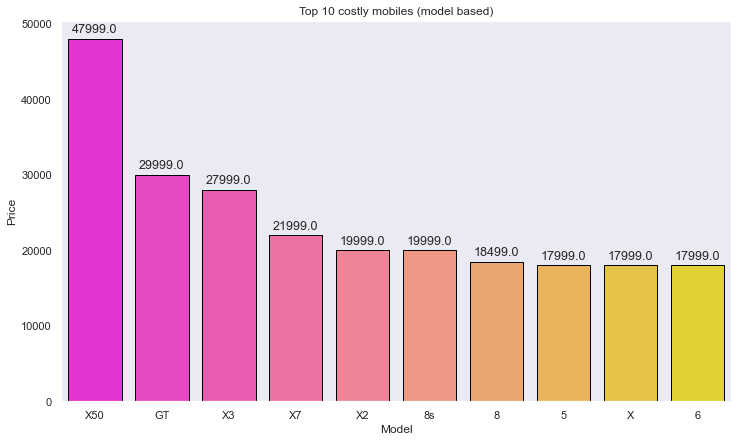

In [55]:
colors = sns.color_palette('spring',10)
sns.set(rc={'figure.figsize':(12,7)})
a = sns.barplot(df1['Model'],df1['Price'],palette=colors,edgecolor='black')
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=12.6)
plt.grid(False)
plt.title('Top 10 costly mobiles (model based)')
plt.show()

In [56]:
#2)Rating of Top 10 costly models

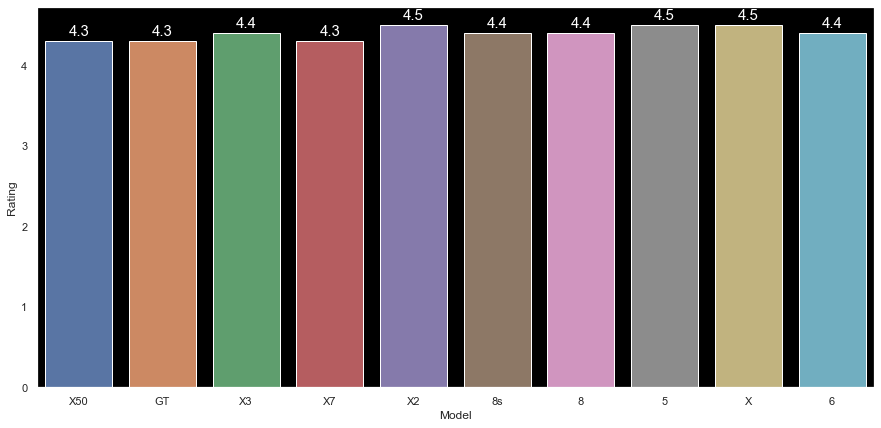

In [57]:
sns.set(rc={'figure.figsize':(15,7)})
a = sns.barplot(x="Model",y="Rating",data=df1)
a.set_facecolor("black")
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',color='white',fontsize=15)
plt.grid(False)

In [58]:
#3) Battery Size for Top 10 costly mobiles

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


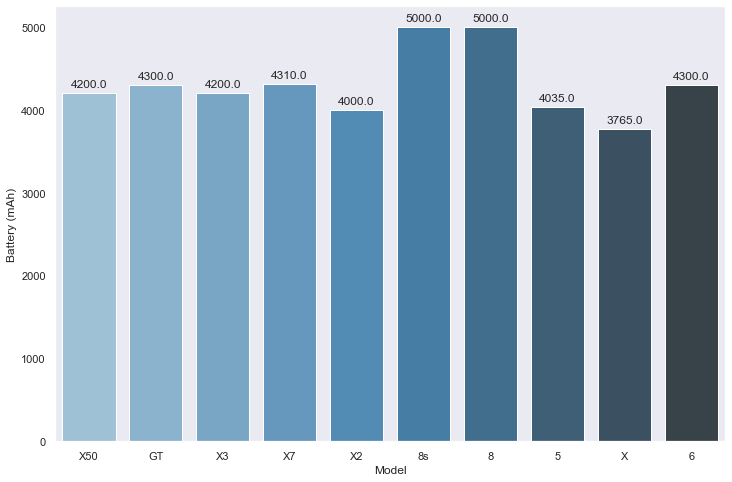

In [59]:
colors = sns.color_palette('summer_r',10)
sns.set(rc={'figure.figsize':(12,8)})
a = sns.barplot(df1['Model'],df1['Battery (mAh)'],palette='Blues_d')
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=12)
plt.grid(False)
plt.show()

In [60]:
#4) RAM & ROM size for Top 10 costly models

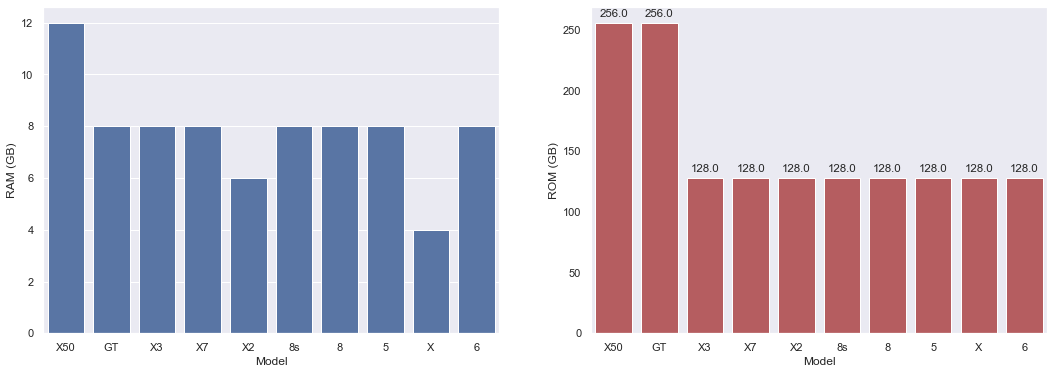

In [61]:
f, axes = plt.subplots(1, 2, figsize=(18,6))

sns.barplot(x='Model',y='RAM (GB)',color='b',data=df1,ax=axes[0])

b = sns.barplot(x='Model',y='ROM (GB)',color='r',data=df1,ax=axes[1])
for p in b.patches:
    b.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
plt.grid(False)


In [62]:
#5) Ratings count of all models

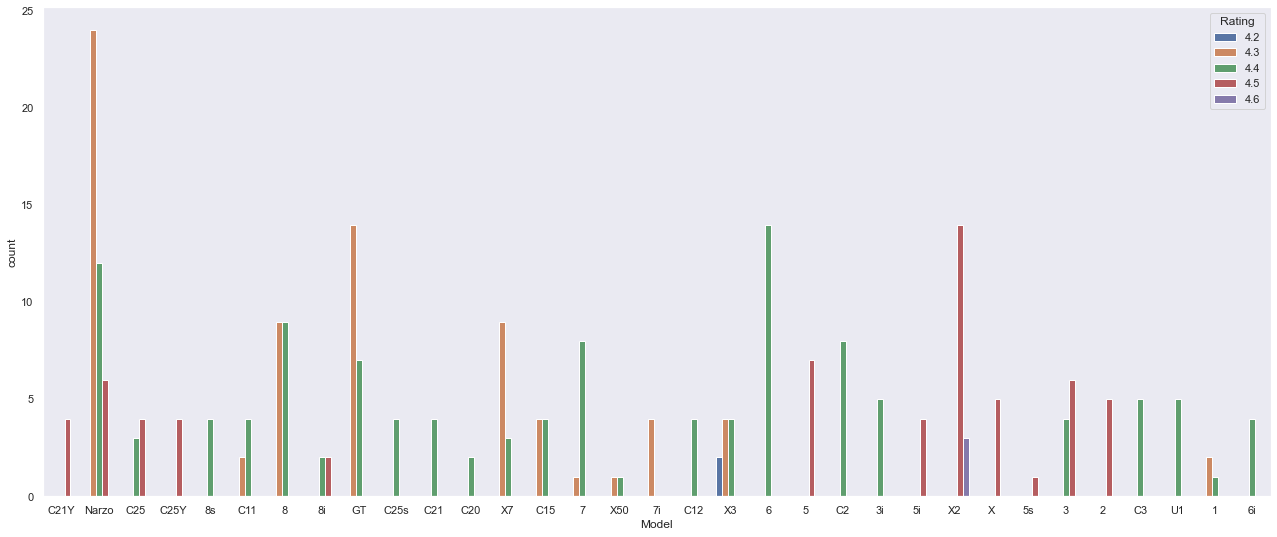

In [63]:
sns.set(rc={'figure.figsize':(22,9)})
sns.countplot(x='Model',hue='Rating',data = df)
plt.grid(False)
plt.show()

In [64]:
#6) Count of Processors for different models

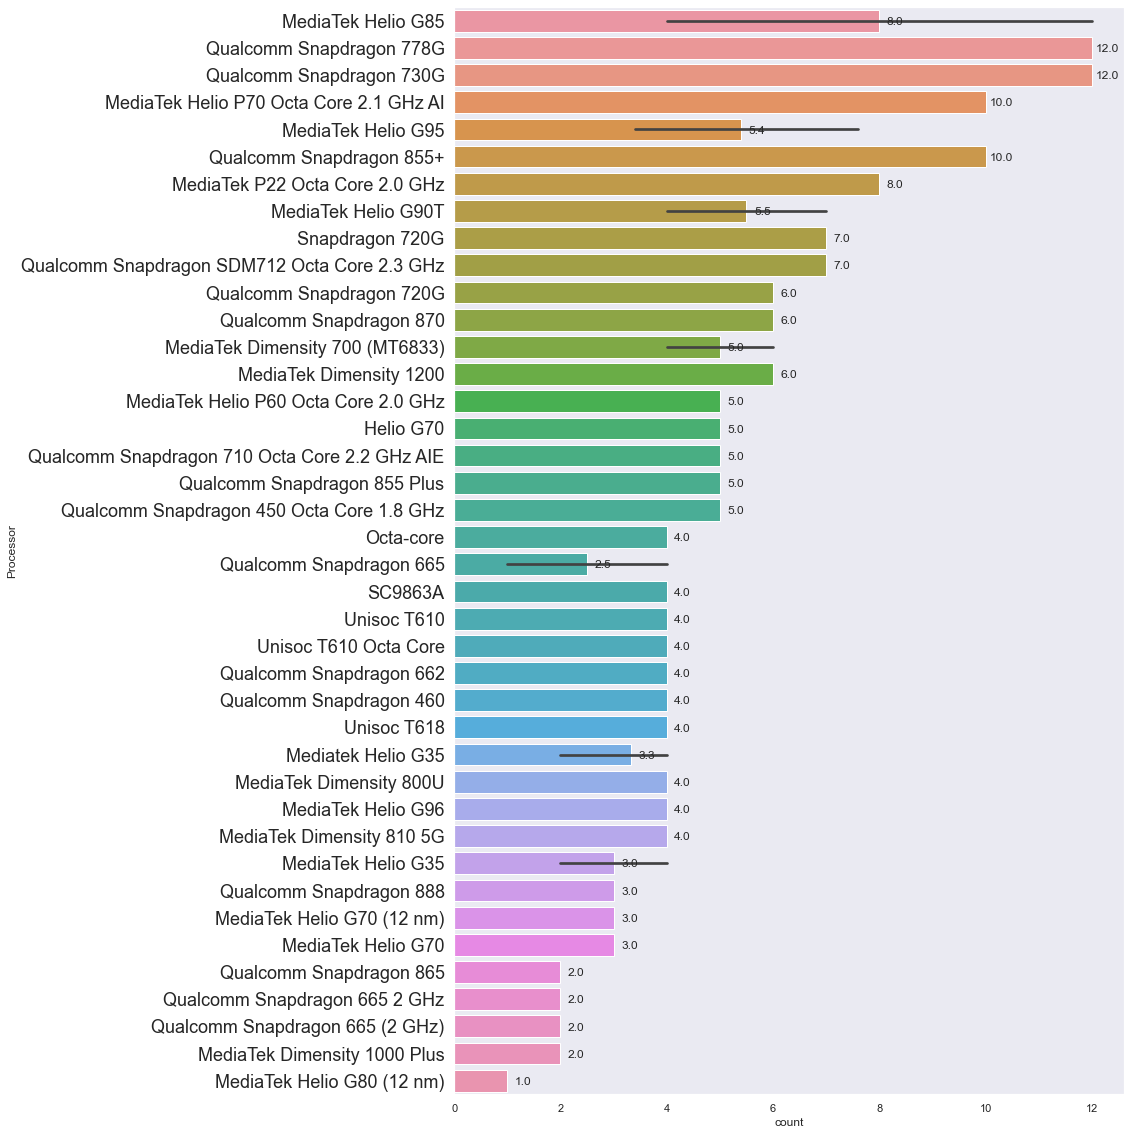

In [65]:
df_unique_processors = df.groupby(by=['Processor','Model'])['Price'].count().reset_index().rename(columns={"Price":"count"})
df_unique_processors = df_unique_processors.sort_values(by='count',ascending=False).reset_index()
df_unique_processors.drop('index',axis=1,inplace=True)
sns.set(rc={'figure.figsize':(12,20)})
plt.yticks(fontsize=18)
a = sns.barplot(y='Processor',x='count',data=df_unique_processors)
for p in a.patches:
    width = p.get_width()
    plt.text(0.3+p.get_width(),p.get_y()+0.55*p.get_height(),'{:1.1f}'.format(width),ha='center',va='center')
plt.grid(False)


In [66]:
#7) Count of Display size for all mobiles

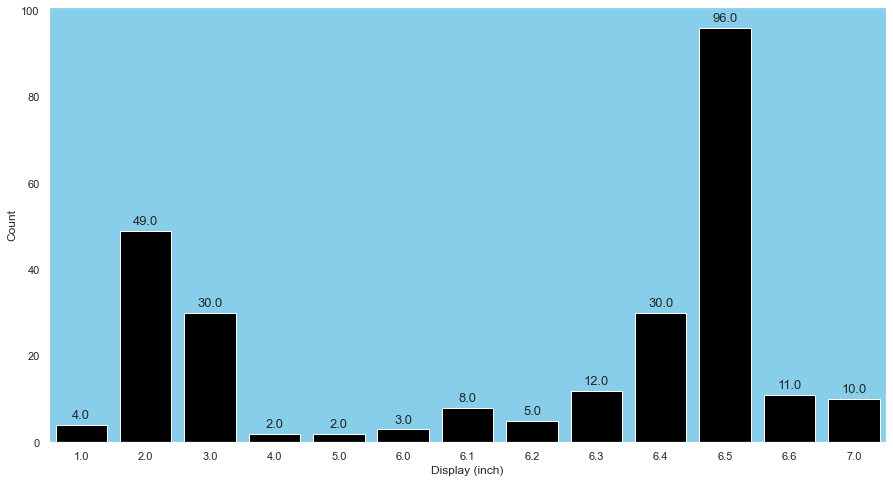

In [67]:
df_display = df["Display (inch)"].value_counts().reset_index().rename(columns={'index':'Display (inch)',
                                                                               'Display (inch)':'Count'})
df_display.sort_values(by='Count',ascending=False,inplace=True)
sns.set(rc={'figure.figsize':(15,8)})
a = sns.barplot(x='Display (inch)',y='Count',data=df_display,color='black')
a.set_facecolor("skyblue")
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=13)
plt.grid(False)

In [68]:
#8) Number of mobile based on model

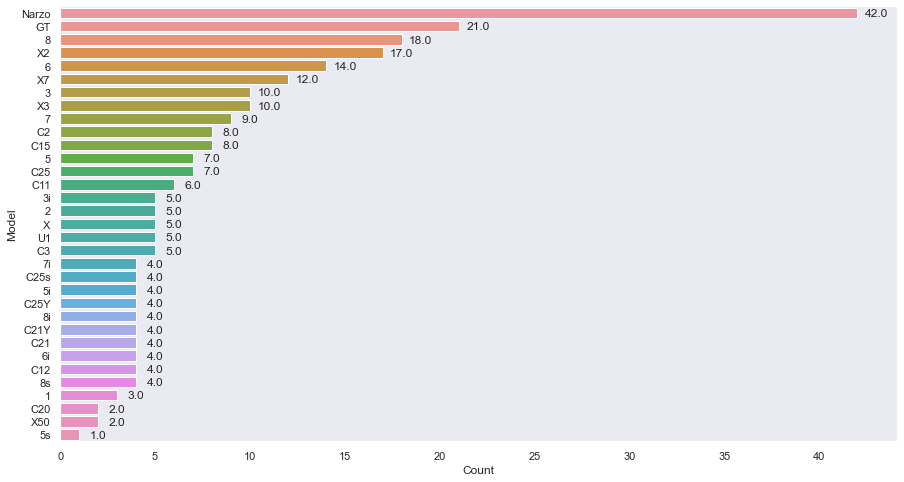

In [69]:
df_model = df.groupby(by='Model')["Price"].count().reset_index().rename(columns={'Price':'Count'})
df_model = df_model.sort_values('Count',ascending=False)
a = sns.barplot(y="Model",x="Count",data=df_model)
for p in a.patches:
    width = p.get_width()
    plt.text(1+p.get_width(),p.get_y()+0.55*p.get_height(),'{:1.1f}'.format(width),ha='center',va='center')
plt.grid(False)

In [70]:
#9) Check Prize

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


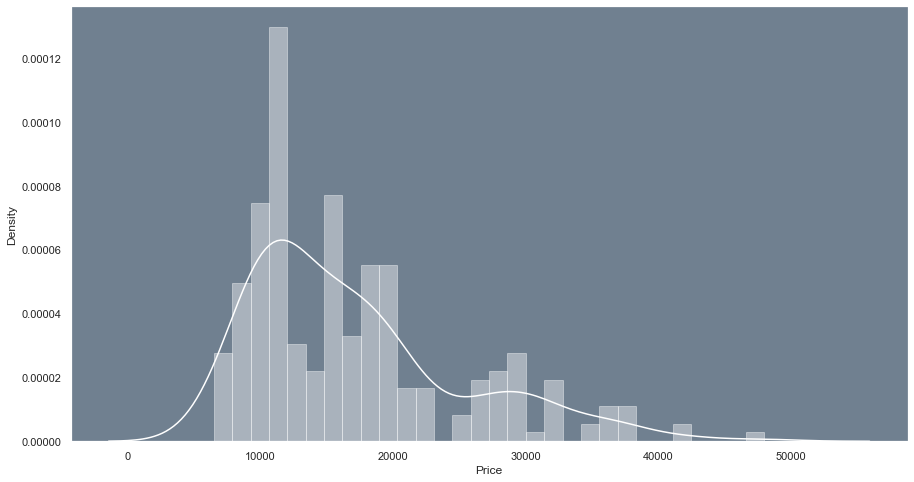

In [71]:
a = sns.distplot(df['Price'],color='white',bins=30)
a.set_facecolor("slategrey")
plt.grid(False)
plt.show()

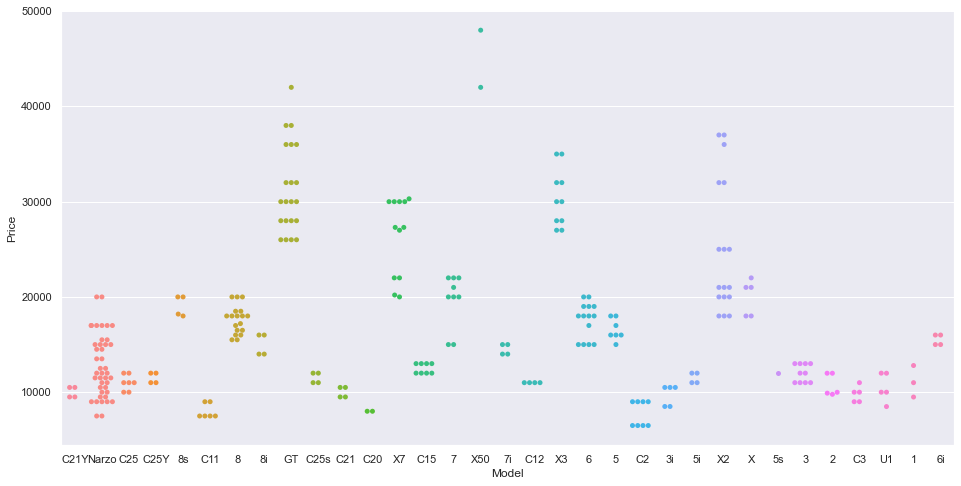

In [72]:
plt.figure(figsize=(16,8))
sns.swarmplot(x='Model', y='Price',data=df)
plt.show()

In [73]:
#10) Check correlation

<AxesSubplot:xlabel='Rating', ylabel='Model'>

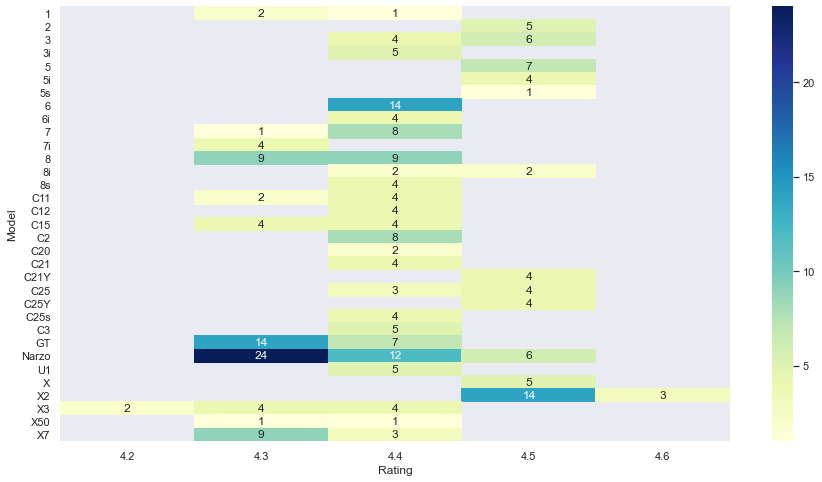

In [74]:
grp = df.groupby(['Model','Rating'])
Brand_Rating = grp.size().unstack()
Brand_Rating
sns.heatmap(Brand_Rating, cmap="YlGnBu", annot = True)

<module 'matplotlib.pyplot' from 'C:\\Users\\sagar\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

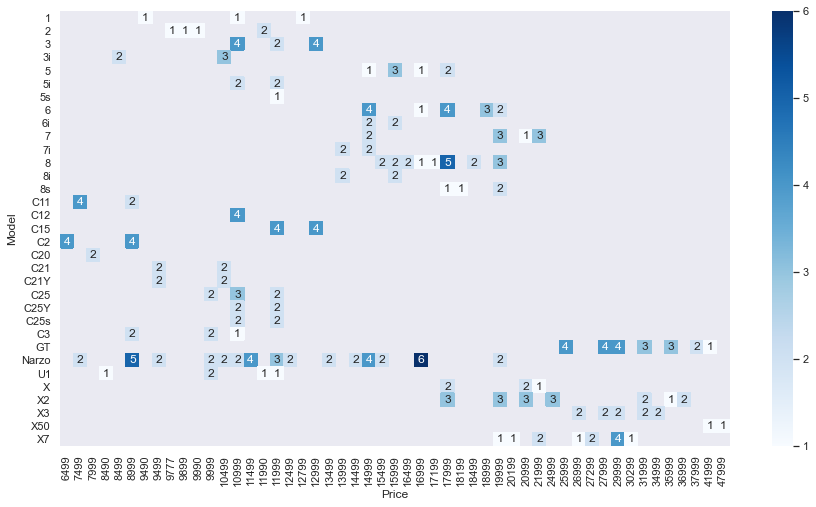

In [75]:
grp = df.groupby(['Model','Price'])
Brand_Rating = grp.size().unstack()
Brand_Rating
sns.heatmap(Brand_Rating, cmap="Blues", annot = True)
plt

# Conclusion

>'X50' model has the highest price i.e, 41999/- in realme brand and its rating is 4.4, with a battery capacity of 4200 mAh.

>The only model with '4.6' rating is 'X2'.

>The only model with highest '4.3' rating is 'Narzo'

>Most oftenly used Processors:

1) 'Qualcomm Snapdragon 730G'
2) 'Media Tek Helio P70 Octa Core 2.1 GHz AI'
3) 'Qualcomm Snapdragon 855+'

>81 mobiles have '6.5' inch display

>Top models

1) There are '37' Realme-Narzo mobiles
2) There are '18' Realme-X2 & Realme-8 mobiles
3) There are '16' Realme-6 mobiles

>Realme-Nazro & Realme 7 are strongly correlated with price.

The above data in conclusion may change upon time to time because the data in the website is not static.